In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import matplotlib.pylost

In [2]:

'''
The data is downloaded to the project folder this
notebook belongs to. From this project folder we can 
access the data by simply changing the directory to 
'cell_images/'

The code to organize directories was found in:
https://medium.com/gradientcrescent/building-a-malaria-classifier-with-keras-background-implementation-d55c32773afa
''' 
base_dir = 'cell_images/' 

# Our working directory is where we will copy the data
# into so we can manipulate it without messing up the original data
work_dir = "work/" #path way to working directory
os.mkdir(work_dir) # Make the working directory

parasitized = 'cell_images/Parasitized/' # pathway to infected cell images
uninfected = 'cell_images/Uninfected/' # pathway to uninfected cell images

work_dir_parasitized = "work/parasitized/" # where we will store our copy of the parasitized data
os.mkdir(work_dir_parasitized) # Creation of parasitized folder in working directory
work_dir_uninfected = 'work/uninfected/' # where we will store our copy of the uninfected data
os.mkdir(work_dir_uninfected) # Creation of uninfected folder in working directory

# Create folder in our working directory to store our training data
train_dir = os.path.join(work_dir,'train')
os.mkdir(train_dir)

# Create folder in our working directory to store our validation data
validation_dir=os.path.join(work_dir, 'validation')
os.mkdir(validation_dir)

# Create folder in our working directory to store our testing data
test_dir = os.path.join(work_dir, 'test')
os.mkdir(test_dir)

# Create folders for the output of model infected, and uninfected for each set
train_pos_dir = os.path.join(train_dir, 'positive')
os.mkdir(train_pos_dir)
train_neg_dir = os.path.join(train_dir, 'negative')
os.mkdir(train_neg_dir)

validation_pos_dir = os.path.join(validation_dir, 'positive')
os.mkdir(validation_pos_dir)
validation_neg_dir = os.path.join(validation_dir,'negative')
os.mkdir(validation_neg_dir)

test_pos_dir = os.path.join(test_dir,'positive')
os.mkdir(test_pos_dir)
test_neg_dir = os.path.join(test_dir, 'negative')
os.mkdir(test_neg_dir)

In [3]:
# Using the shutil package, copy the original data into our working directories
# and rename the images to make them easy to call and
# view.
'''
The code for how to copy over the data was found in:
https://medium.com/gradientcrescent/building-a-malaria-classifier-with-keras-background-implementation-d55c32773afa
'''
i = 0
for images in os.listdir(parasitized):
    dst="malaria_pos" + str(i) + ".jpg"
    src=parasitized + images
    dst=work_dir_parasitized + dst
    
    shutil.copy(src,dst)
    i = i + 1

i = 0
for images in os.listdir(uninfected):
    dst="malaria_neg" + str(i) + ".jpg"
    src=uninfected + images
    dst=work_dir_uninfected + dst
    
    shutil.copy(src,dst)
    i = i + 1  

In [4]:
# This section organizes the data into train, validation, and test sets
# We know we have 27,558 images
# 13779 belong to parasitized, 13779 belong to uninfected
# We will split the training and test 80/20
# from the training we will split 80/20 for training and validation
# Training: 8818
# Validation: 2204
# Test: 2755
fnames = ['malaria_pos{}.jpg'.format(i) for i in range(8818)]
for fname in fnames:
    src = os.path.join(work_dir_parasitized, fname)
    dst = os.path.join(train_pos_dir,fname)
    shutil.copyfile(src, dst)
    
fnames = ['malaria_pos{}.jpg'.format(i) for i in range (8818,11018)]

for fname in fnames:
    src = os.path.join(work_dir_parasitized, fname)
    dst = os.path.join(validation_pos_dir,fname)
    shutil.copyfile(src,dst)
    
fnames=['malaria_pos{}.jpg'.format(i) for i in range(11018,13773)]
for fname in fnames:
    src = os.path.join(work_dir_parasitized, fname)
    dst = os.path.join(test_pos_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['malaria_neg{}.jpg'.format(i) for i in range(8818)]
for fname in fnames:
    src = os.path.join(work_dir_uninfected, fname)
    dst = os.path.join(train_neg_dir,fname)
    shutil.copyfile(src, dst)
    
fnames = ['malaria_neg{}.jpg'.format(i) for i in range (8818,11018)]

for fname in fnames:
    src = os.path.join(work_dir_uninfected, fname)
    dst = os.path.join(validation_neg_dir,fname)
    shutil.copyfile(src,dst)
    
fnames=['malaria_neg{}.jpg'.format(i) for i in range(11018,13773)]
for fname in fnames:
    src = os.path.join(work_dir_uninfected, fname)
    dst = os.path.join(test_neg_dir,fname)
    shutil.copyfile(src,dst)
    
    
print('total training pos images:', len(os.listdir(train_pos_dir)))
print('total training malaria_neg images:', len(os.listdir(train_neg_dir)))
print('total validation pos images:',len(os.listdir(validation_pos_dir)))
print('total validation malaria_neg images:', len(os.listdir(validation_neg_dir)))
print('total test pos images:', len(os.listdir(test_pos_dir)))
print('total test malaria_neg images:', len(os.listdir(test_neg_dir)))







total training pos images: 8818
total training malaria_neg images: 8818
total validation pos images: 2200
total validation malaria_neg images: 2200
total test pos images: 2755
total test malaria_neg images: 2755


In [15]:
# This section is for data preprocessing

# This will normalize pixel intensities
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
steps_per_epoch = len(train_generator)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size = (150,150),
    batch_size=20,
    class_mode='binary')

print("Image preprocessing complete")

Found 17636 images belonging to 2 classes.
Found 4400 images belonging to 2 classes.
Image preprocessing complete


In [16]:
# The convolution layer will separate the low and high level features by identifying
# which pixel patterns are important
# The pooling layer will select the max
# output value of a convolution for the output activation
# map. 
# then the reduced output from these two layers is 'flattened'

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras import optimizers
from tensorflow.keras.optimizers import Adam
# We will optimize using a learning rate: by specifiying a low learning rate we make sure the algorithm doesn't change quickly
# and skip the optimal solution all together.
learning_rate = 0.0001
learning_opt = Adam(learning_rate)

verbose = 1
epochs = 10
model.compile(loss='binary_crossentropy',
optimizer=learning_opt,
metrics=['acc'])

print("Model created")


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [17]:
# This is the chunk that takes forever to run, more than an hour. Try adding workers!
validation_steps = len(validation_generator)

# Start training our model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps=validation_steps)
model.save('basic_malaria_pos_neg_v1.h5')




C:\Users\amsha\AppData\Local\Temp\ipykernel_42168\2585948969.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
882/882 [==============================] - 1021s 1s/step - loss: 0.4103 - acc: 0.8018 - val_loss: 0.2742 - val_acc: 0.8807
Epoch 2/10
882/882 [==============================] - 1591s 2s/step - loss: 0.1698 - acc: 0.9428 - val_loss: 0.2218 - val_acc: 0.9234
Epoch 3/10
882/882 [==============================] - 1112s 1s/step - loss: 0.1504 - acc: 0.9526 - val_loss: 0.2191 - val_acc: 0.9289
Epoch 4/10
882/882 [==============================] - 836s 948ms/step - loss: 0.1384 - acc: 0.9566 - val_loss: 0.2120 - val_acc: 0.9239
Epoch 5/10
882/882 [==============================] - 833s 945ms/step - loss: 0.1286 - acc: 0.9586 - val_loss: 0.2523 - val_acc: 0.9075
Epoch 6/10
882/882 [==============================] - 1317s 1s/step - loss: 0.1196 - acc: 0.9624 - val_loss: 0.2018 - val_acc: 0.9284
Epoch 7/10
882/882 [==============================] - 1049s 1s/step - loss: 0.1133 - acc: 0.9622 - val_loss: 0.2152 - val_acc: 0.9280
Epoch 8/10
882/882 [==============================] - 794s

C:\Users\amsha\AppData\Local\Temp\ipykernel_42168\3802659865.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label='Training acc', color='black')
C:\Users\amsha\AppData\Local\Temp\ipykernel_42168\3802659865.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo',label='Training loss', color = 'black')


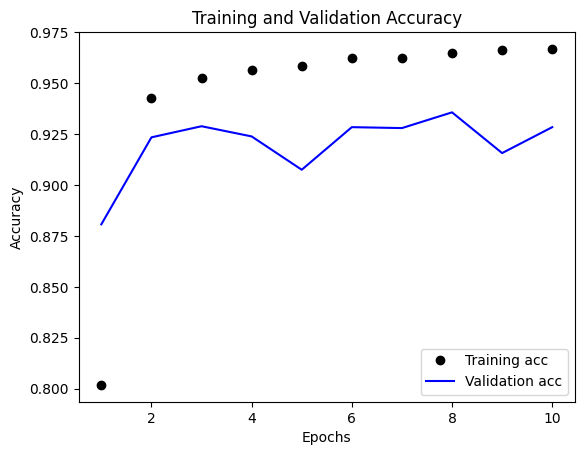

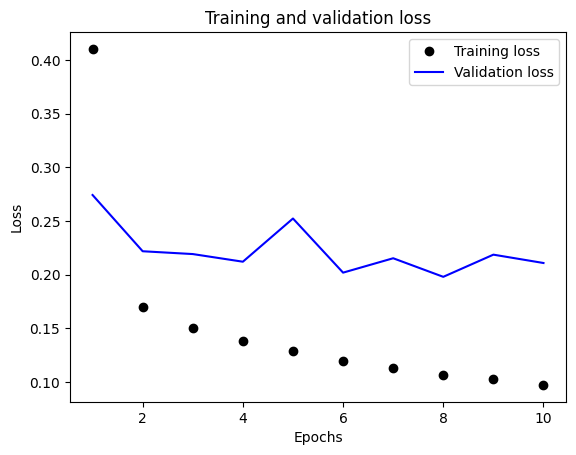

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc', color='black')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

# Plot our accuracies and losses
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo',label='Training loss', color = 'black')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()